In [31]:
from keras.datasets import imdb

In [32]:
import numpy as np
np_load_old=np.load

#modify the default parameter of np.load
np.load=lambda *a,**k: np_load_old(*a,allow_pickle=True,**k)

(X_t,Y_t),(X_T,Y_T)=imdb.load_data(num_words=10000)

np.load=np_load_old

In [33]:
X_t.shape , Y_t.shape

((25000,), (25000,))

In [34]:
X_T.shape , Y_T.shape

((25000,), (25000,))

In [35]:
print(len(X_t[0]))         #each sentenceis of different length
print(len(X_t[1]))

218
189


In [36]:
print(X_t[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [37]:
d=imdb.get_word_index()

In [38]:
d                       #the words are shifted byy three because of padding start and end

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [39]:
rev_d=dict([value,key] for (key,value) in d.items()) 

In [40]:
rev_d

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [41]:
# reading first review
r0=' '.join([rev_d.get(k-3,'!') for k in X_t[0]])
print(r0)

! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ! is an amazing actor and now the same being director ! father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ! and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ! to the two little boy's that played the ! of norman and paul they were just brilliant children are often left out of the ! list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [42]:
r1=' '.join([rev_d.get(k-3,'!') for k in X_t[1]])
print(r1)

! big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ! the hair is big lots of boobs ! men wear those cut ! shirts that show off their ! sickening that men actually wore them and the music is just ! trash that plays over and over again in almost every scene there is trashy music boobs and ! taking away bodies and the gym still doesn't close for ! all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


## CREATING X_TRAIN 2D TENSOR

In [43]:
max_len=-1000
av_len=0
for s in X_t:
    l=len(s)
    av_len+=l
    if l>max_len:
        max_len=l
        
av_len=av_len/X_t.shape[0]

In [44]:
print(av_len)
print(max_len)

238.71364
2494


In [45]:
#the sentences have varing len
## let the max_len for the 2d tensor be 1000
from keras.preprocessing import sequence

In [46]:
X_train=sequence.pad_sequences(X_t,maxlen=1000)
X_test=sequence.pad_sequences(X_T,maxlen=1000)

In [47]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [48]:
print(X_train.shape)
print(X_test.shape)

(25000, 1000)
(25000, 1000)


## BUILDING MODEL

In [49]:
# make embedding layer -- self trained
#define model
from keras import models
model=models.Sequential()

In [50]:
from keras.layers import Embedding, SimpleRNN, Dense

In [51]:
model.add(Embedding(10000,128))
model.add(SimpleRNN(64))
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,292,417
Trainable params: 1,292,417
Non-trainable params: 0
_________________________________________________________________


In [53]:
#compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [54]:
hist=model.fit(X_train,Y_t,epochs=7,batch_size=128,validation_split=0.2)

W0914 16:17:49.801599 22560 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/7
20000/20000 [==============================] - 99s 5ms/step - loss: 0.6023 - acc: 0.6593 - val_loss: 0.4228 - val_acc: 0.8172
Epoch 2/7
20000/20000 [==============================] - 106s 5ms/step - loss: 0.3540 - acc: 0.8459 - val_loss: 0.4229 - val_acc: 0.8236
Epoch 3/7
20000/20000 [==============================] - 103s 5ms/step - loss: 0.1462 - acc: 0.9478 - val_loss: 0.4448 - val_acc: 0.8252
Epoch 4/7
20000/20000 [==============================] - 104s 5ms/step - loss: 0.0285 - acc: 0.9946 - val_loss: 0.5482 - val_acc: 0.8126
Epoch 5/7
20000/20000 [==============================] - 116s 6ms/step - loss: 0.0058 - acc: 0.9997 - val_loss: 0.5941 - val_acc: 0.8188
Epoch 6/7
20000/20000 [==============================] - 134s 7ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6303 - val_acc: 0.8192
Epoch 7/7
20000/20000 [==============================] - 153s 8ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6533 - val_acc: 

In [55]:
hist.history?

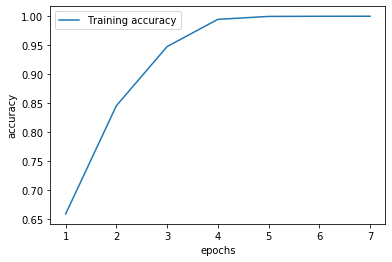

In [57]:
import matplotlib.pyplot as plt
h_dict=hist.history
plt.plot([i for i in range(1,8)], h_dict['acc'],label="Training accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

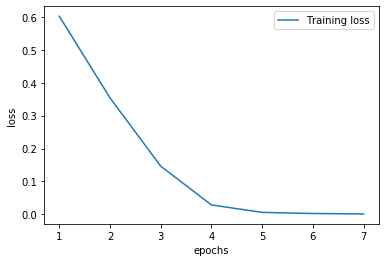

In [58]:
plt.plot([i for i in range(1,8)], h_dict['loss'],label="Training loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [59]:
model.save('RNN_model/my_model.h5')

In [60]:
model.load_weights('RNN_model/my_model.h5')

In [61]:
model.evaluate(X_test,Y_T)

25000/25000 [==============================] - 99s 4ms/step


[0.6499306866335869, 0.82616]

**TESTING LOSS**: 0.6499
**TESTING ACCURACY**: 0.82616